# Lensing a flat-sky map

In [1]:
using CMBLensing, PyPlot

First we load a simulated unlensed field, $f$, and lensing potential, $\phi$,

In [2]:
@unpack f,ϕ = load_sim_dataset(
    θpix  = 2,       # size of the pixels in arcmin
    Nside = 256,     # number of pixels per side in the map
    T     = Float32, # Float32 or Float64 (former is ~twice as fast)
    pol   = :I       # :I for Intensity, :P for polarization, or :IP for both
);

We can lense the map with LenseFlow,

In [3]:
f̃ = LenseFlow(ϕ) * f;

And flip between lensed and unlensed maps,

In [4]:
animate([f,f̃], fps=1)

HTML{String}("<video width=\"560\" height=\"400\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADbmW1kYXQAAAKuBgX//6rcRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg\nQVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv\neDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9\nMHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm\nPTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6\nb25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9v\na2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh\nY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly\nYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3\nZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz\naD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx\ncG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAALOJZYiE\nABb//vfTP8yy6/c5teOo96KeJl9DdSUBm5bFC1f+C3ffAAV+zknD/nLEjahgS7EV8eLvXQgAAAMA\njucBdyP2xpRWDUDNf6scr5qZ9rwADrRhvMwbK1c7K82tTrR2CA6aher0hE0VxQG90HmgbGyXImSP\nqm/4OwAJXeuuJNeEK6HBC9cHUzx0t6RUnN6DsADGFx2A2fN1pclb5vEJ5dLovj41ziyW3j73BhT4\nMLoG/+DkPj7q/SEu9f+p/Z3Flp6uxGUJAVESLtPieU4OlvjTs57ONhjq/eKuDx4Ir05GLcY4ax0L\nZZsmT2tMzC+T6ZKH+z9b7BellnWo5CP3k7GMmWTznSZlzmZNMK0boc+afm+H2mvv5ja6x+A0Eedn\nwhdVxP5z+6eIrOTaa8V0Z4osLvH3N8qRNKPzZqUkjufk3fjZHyE+JaXyA5fCAP3k5MNHBARAfZf6\nNyst4XMMOkf90pRMtGkXshKVMg08x2LnDivnp6IH27rdJKhUAMeAb6bXWEvPwumrqCShQ4we2MH/\nxTWQ3qtyZz0KlzXTi3FyM7Frmr3V1rrmEP3djtHqeSM0M+ZRkCrW3uYcIj/IDPe+cXUBYddGlJO5\nJnPqW5trZyBfJcO5/XFxE3CLHgr0OjQla9RSjcnolBvKSdrzT+PLuaOSPxhsXGFZvaVWwpibONCI\nZKVoiz5nJ83ZOzwdXpBQ/Q2ywFGPqvau7NoKXDJfyMMUzmbJXG0sRa3hgH8rlzVRc8wGyAt1OkJb\nzAOogRpjzzDAUcX6+1hZdqoUjr9MoXOx/Tg68Uq7b012djLnuPY3mx+BfrXQxNncrhtouRxP+uza\nplT6fR2XVm73t56L/+H0YbN0k7SePBVCNgYY0Jcxa3O+cSe3mmhxpOPYuD/I7tC9Dwn8QnSfE+f6\ni0m71rrkkwI8SrYoTtwaZkHP2wjRKUiV1mBJgUEUeWKRLIgxScpA8ewM9m6R+IAKqk9qgYFpWqiE\n7a/11hNC2oQdHnRgU6hF434lCe45ST5EjnQy9T5Rwxq1fgoStfj9WAiR3XeZlx9+r6hUIADf5V/Y\nQXQojEHwmFCOCLIekMSpokiLRj0aZ/cO1OAkau/GjUdd0GjHsa0OYuGRP6UNKBrdUaYeVRhJnvJN\nBPAzP81jLu1QmceUlhQ2uENc6Nb34A+IO2rFmQ5YKKJWHmZp872Mttd/Z05RJ0tMiK0brassCXXg\nhyYpIHIY8JuS7q0Ihz+5a6G+jCkFqQr/+r43+xqzviBWbPIqcsAAAjenwwKvE0xS8XCoWdJ5pKNq\nMJT4ejlc7f0j0G7GxCtEQ4mPl3kzoiT3DTqq9lwaIB+1eibSZI6cJV23GXLPjpFv1LpsbTYlGXFP\n15Jpnk6UpaXwyCZoF6PXZGeTByKn6+79FPxgiEUl1aDgJBjelSnzHm2pKwY2NtJ3GiK49qY7o8fz\nAmevO2e7cbajeJSAX+L9I3PCRFtrMYT6z4zrHy3ZSW+p9piyU2iGH/6v2CVARy71Bk2kARII4JGD\nxmGJmec8c8ywuzSBa9OfOZOktdeJt9VdmZREntKFcnk9aPzDN3f49c+ZoVjCKQQj4cV2zf2+Ucqc\nxfs5XR2CJ+Iqg5Ye2HVVWq1pbAV/9UvhZrUs93nqKV0bag9i8gqiQGMFPCdpNBtzf+kYEuS7YSOF\nEVZgQTwc+or8s66qlQickLuItotyNYGuVTU9Dol8rKIs2B1WzwnJDC8H/f84LCDYcdskzbmQblJQ\n8GcEq7Qd8TyLlaiBAlR/B5jzTkFzgdOULnMpT45ft+YnW8RyU3zztQC4tkp47z59uio4t/3w27mJ\nibo/rBYBZEMrm+iDgwqojNEDOu8Esk1onUtc75M7AmZ4xHGO63HuMEun35TsUQD0c7ApJfcQdbvF\ntA2vKng82yibPH+OqsAJQoc8bGBhqoXF0ojs5lvmvEr8rIuXb0GfBAIrFqg2DB0Q9CyDq7Qb+RLT\nCvXPISlSu05hxHXt4rYEZRTVAhVSXTrDPcmITO6ZqG/EIErc1NsxResBMJd9UCBsAuEV1PSx2vH9\nDyC3+Cc4E3RVZBGYT6hixThWMv7ROjKN9kU19VCfNvmIXys4VhDyy7rjXrvZ+UTy18gtal6AhPfL\nqDJ/JgXCD0JeVZbJ9EP9pawZpjDJ3RaUxZXhnYThx+7ria7xKVSia8QJUAC4L8WvTKttnX0M8uZ0\n12/VEvfUZ+udz1BMaIhX2nxt/nvIamIVXt2QRJtRFlwV300Z6cANixwHK3Cizbl0kGfilACQ3Q+/\naq/iKWbfEuQi6RDTXIlAr0slsp0sjIZAyDJk27iGVv7WfKfKuOfJrgD89HrX+QFmiPl0/AAjyL4+\nwzFkdqJGDoB/YRiYhCcrviL/l7RFsy6pIPakpvH3Xw6OQJ3hzHskPow5eTEPRSetn1FpH1Vn+Mpf\n4OTtUEsOOrLB0NabUDZn3IJy94cRqKnEtHLovcHPBzvu5C/Zwc4FbaFcOR2BLW4b/7Ci1HNlXX83\n3+vyWyZq8Gag0KPI2bNDzPpaieEv4mmWkt2RgKqXMS4UqYSgk2p/DXCLDoscP/5rV3ZdBQJQz2dk\nUZMWHUyq45LhxTTCq5GCvSto6iOK3fzbXGn1I+nj66UablU/X+a9Vr90LtXMhCIRJQvv20SYaOsW\n+D/B/ueCfL0D5V9RO6qIMhvKMVwODf3mqHujRqzEhfiFtmGia6+SMfp3zkXGiBwzNTJjudI7YhpT\n0711QItYtdUAt75XWhzGss7m/fRbP6CO9oPaerQ4fRTER9

The difference between lensed and unlensed,

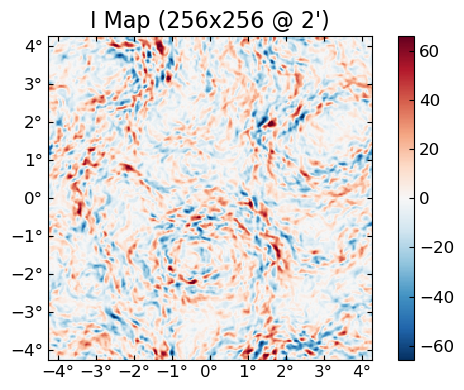

In [5]:
plot(f-f̃);

## Loading your own data

CMBLensing flat-sky `Field` objects like `f` or `ϕ`  are just thin wrappers around arrays. You can get the underlying data arrays for $I(\mathbf{x})$, $Q(\mathbf{x})$, and $U(\mathbf{x})$ with `f[:Ix]`, `f[:Qx]`, and `f[:Ux]` respectively, or the Fourier coefficients, $I(\mathbf{l})$, $Q(\mathbf{l})$, and $U(\mathbf{l})$ with `f[:Il]`, `f[:Ql]`, and `f[:Ul]`,

In [6]:
mapdata = f[:Ix]

256×256 Array{Float32,2}:
  -47.7102    -34.9647   -21.7103   …   -20.6531    -40.7061   -51.3876 
  -40.5411    -27.3087   -18.2378       -20.167     -37.0121   -45.7919 
  -25.0557    -14.3396    -7.54758       -1.58043   -15.9281   -26.7608 
  -13.026      -1.108      6.63879       25.1332     10.1768    -9.84332
   -7.44512     7.01091   14.0041        33.805      19.3305    -4.17831
   -6.73209     7.06818   11.8671   …    28.1107     13.5629    -5.38841
   -0.75691    10.7998    10.2065        31.12       15.5826    -1.73835
   13.0998     22.7183    21.0428        46.9958     29.78      11.803  
   23.6803     31.0646    35.648         52.0531     36.8005    23.8697 
   30.2472     36.5509    42.6953        38.6855     28.5883    26.023  
   34.1449     42.2799    47.2926   …    26.6641     19.0471    22.3078 
   33.2625     49.5034    62.8604        26.9975     17.4837    18.0082 
   34.2413     62.5433    86.71          33.6806     21.1697    16.5691 
    ⋮                    

If you have your own map data in an array you'd like to load into a CMBLensing `Field` object, you can construct it as follows:

In [7]:
FlatMap(mapdata, θpix=3)

65536-element FlatMap{256×256 map, 3′ pixels, fourier∂, Array{Float32}}:
  -47.71015  
  -40.541084 
  -25.055717 
  -13.025993 
   -7.445122 
   -6.732086 
   -0.7569103
   13.099821 
   23.680265 
   30.24718  
   34.144886 
   33.262505 
   34.241295 
    ⋮        
 -165.77731  
 -161.36076  
 -156.40231  
 -163.01346  
 -162.81598  
 -146.01736  
 -124.41779  
 -102.22653  
  -81.45384  
  -58.31694  
  -39.194653 
  -40.520893 

For more info on `Field` objects, see [Field Basics](../05_field_basics/).

## Inverse lensing

You can inverse lense a map with the `\` operator (which does `A \ b ≡ inv(A) * b`):

In [8]:
LenseFlow(ϕ) \ f;

Note that this is true inverse lensing, rather than lensing by the negative deflection (which is often called "anti-lensing"). This means that lensing then inverse lensing a map should get us back the original map. Lets check that this is the case:

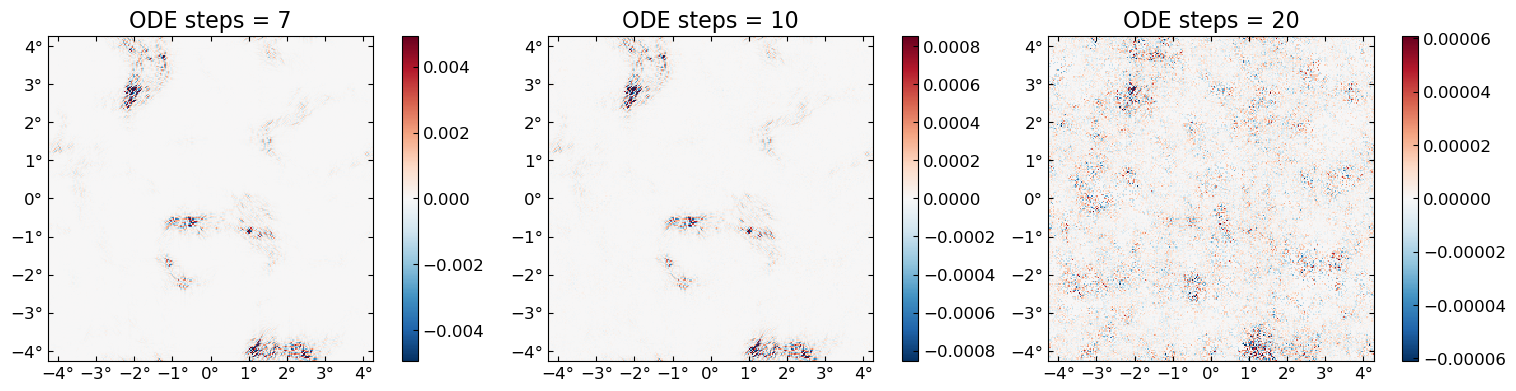

In [9]:
Ns = [7 10 20]
plot([f - (LenseFlow(ϕ,N) \ (LenseFlow(ϕ,N) * f)) for N in Ns],
    title=["ODE steps = $N" for N in Ns]);

A cool feature of LenseFlow is that inverse lensing is trivially done by running the LenseFlow ODE in reverse. Note that as we crank up the number of ODE steps above, we recover the original map to higher and higher precision.

## Other lensing algorithms

We can also lense via:
* `PowerLens`: the standard Taylor series expansion to any order:
$$ f(x+\nabla x) \approx f(x) + (\nabla f)(\nabla \phi) + \frac{1}{2} (\nabla \nabla f) (\nabla \phi)^2 + ... $$

* `TayLens` ([Næss&Louis 2013](https://arxiv.org/abs/1307.0719)): like `PowerLens`, but first a nearest-pixel permute step, then a Taylor expansion around the now-smaller residual displacement

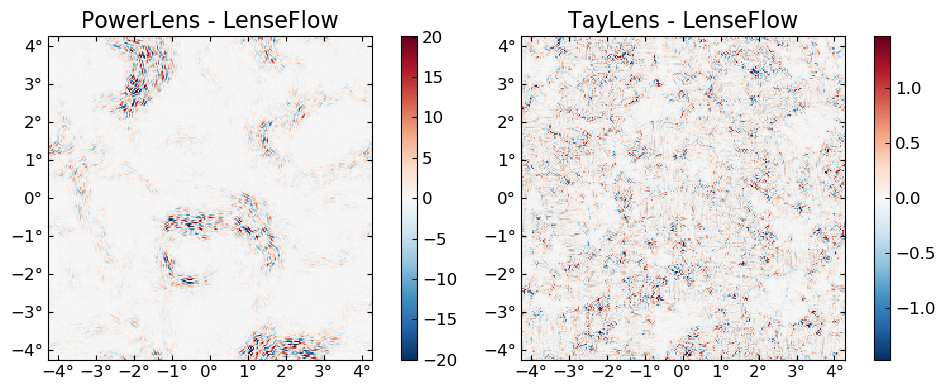

In [10]:
plot([(PowerLens(ϕ,2)*f - f̃) (Taylens(ϕ,2)*f - f̃)], 
    title=["PowerLens - LenseFlow" "TayLens - LenseFlow"]);

## Benchmarking

LenseFlow is highly optimized code since it appears on the inner-most loop of our analysis algorithms. To benchmark LenseFlow, note that there is first a precomputation step, which caches some data in preparation for applying it to a field of a given type. This was done automatically when evaluating `LenseFlow(ϕ) * f` but we can benchmark it separately since in many cases this only needs to be done once for a given $\phi$, e.g. when Wiener filtering at fixed $\phi$,

In [11]:
using BenchmarkTools

In [12]:
@benchmark cache(LenseFlow(ϕ),f)

BenchmarkTools.Trial: 
  memory estimate:  61.10 MiB
  allocs estimate:  2240
  --------------
  minimum time:     23.148 ms (0.00% GC)
  median time:      28.351 ms (11.95% GC)
  mean time:        28.987 ms (8.11% GC)
  maximum time:     55.066 ms (7.61% GC)
  --------------
  samples:          173
  evals/sample:     1

Once cached, it's very fast and memory non-intensive to repeatedly apply the operator:

In [13]:
@benchmark Lϕ * f setup=(Lϕ=cache(LenseFlow(ϕ),f))

BenchmarkTools.Trial: 
  memory estimate:  2.02 MiB
  allocs estimate:  335
  --------------
  minimum time:     18.998 ms (0.00% GC)
  median time:      20.553 ms (0.00% GC)
  mean time:        20.877 ms (0.33% GC)
  maximum time:     28.444 ms (0.00% GC)
  --------------
  samples:          105
  evals/sample:     1